<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1IQ2_CpSYqTh1MAkIt92-UElcX3XyKINx?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
</table>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report

In [2]:
plt.style.use("ggplot")

# 1. Exploratory data analysis

Loading and read the data.

In [3]:
df = pd.read_csv("penguins.csv")
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Drop unnecessary columns.

In [4]:
df.drop(["Unnamed: 0", "year"], axis="columns", inplace=True)
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

View information from the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Identify missing values.

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


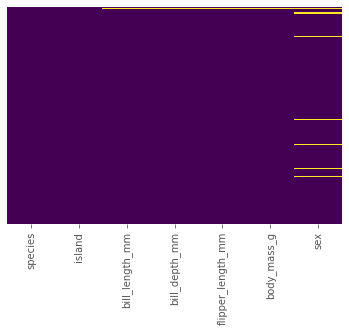

In [6]:
print(df.isna().sum())

# visualize missing value
sns.heatmap(df.isna(), 
            cbar=False, 
            yticklabels=False,
            cmap="viridis")

Handling missing value

In [7]:
df.dropna(axis='index', inplace=True)

See if there is any duplicated data.

In [8]:
df.duplicated().any()

False

Identify the unique value of a column with data type object

In [9]:
for columns in df[["species", "island", "sex"]]: 
    print(f"{columns} : {len(df[columns].unique())} --> {df[columns].unique()}")

species : 3 --> ['Adelie' 'Gentoo' 'Chinstrap']
island : 3 --> ['Torgersen' 'Biscoe' 'Dream']
sex : 2 --> ['male' 'female']


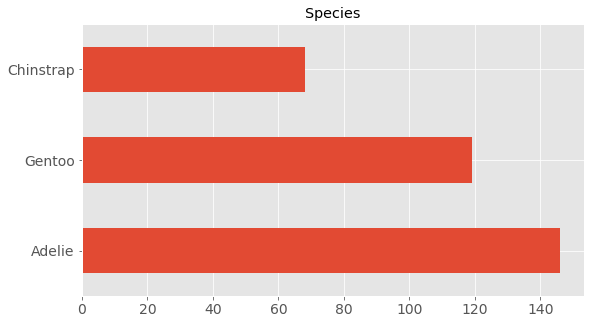

In [10]:
df["species"].value_counts().plot(kind="barh",
                                  figsize=(9, 5),
                                  title="Species",
                                  fontsize=14)

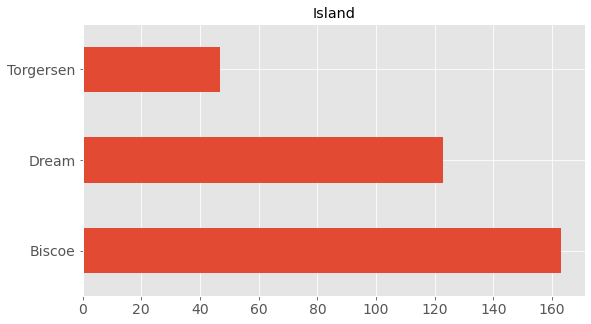

In [12]:
df["island"].value_counts().plot(kind="barh",
                                 figsize=(9, 5),
                                 title="Island",
                                 fontsize=14)

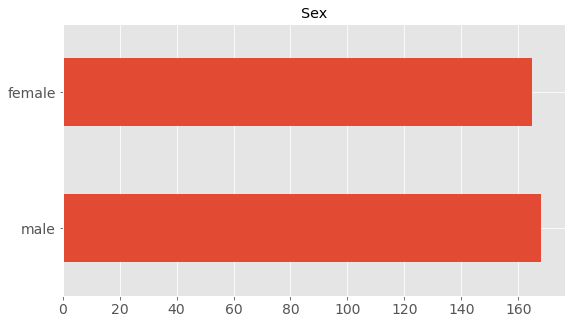

In [13]:
df["sex"].value_counts().plot(kind="barh",
                              figsize=(9, 5),
                              title="Sex",
                              fontsize=14)

View summary descriptive statistics of the data.

In [16]:
df.describe().round()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.0,333.0,333.0,333.0
mean,44.0,17.0,201.0,4207.0
std,5.0,2.0,14.0,805.0
min,32.0,13.0,172.0,2700.0
25%,40.0,16.0,190.0,3550.0
50%,44.0,17.0,197.0,4050.0
75%,49.0,19.0,213.0,4775.0
max,60.0,22.0,231.0,6300.0


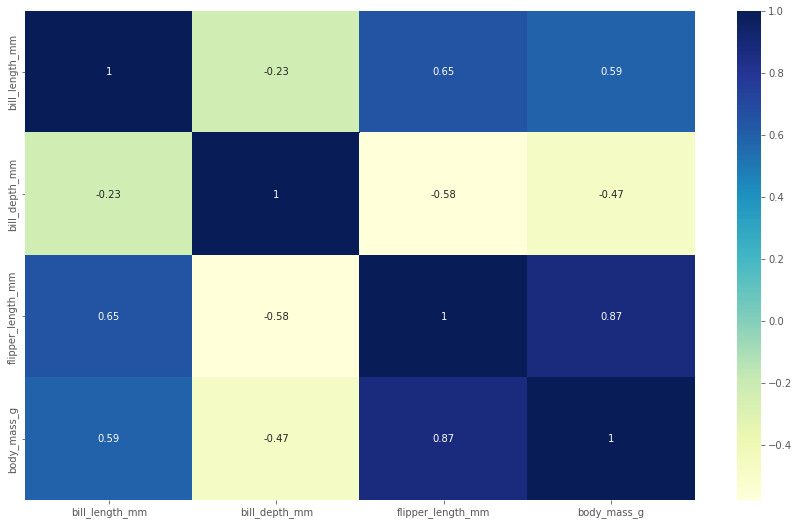

In [15]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

# 2. Data preprocessing

Before handling categorical variables, we must separate exploratory variables and response variables.

In [20]:
X = df.drop("species", axis="columns")
y = df["species"]

In [21]:
X = X.replace(["male", "female"], [0, 1])
island_one_hot = pd.get_dummies(X["island"], prefix="island")
X = X.drop("island", axis="columns")
X = X.join(island_one_hot)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,1


# 3. Modeling

Before we start modeling, we must first separate the training and test data.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)
print(f'X train = {X_train.shape}')
print(f'X test = {X_test.shape}')
print(f'y train = {y_train.shape}')
print(f'y test = {y_test.shape}')

X train = (266, 8)
X test = (67, 8)
y train = (266,)
y test = (67,)


In [75]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
text_representation = export_text(model)
print(text_representation)

|--- feature_2 <= 207.50
|   |--- feature_0 <= 43.05
|   |   |--- feature_1 <= 16.65
|   |   |   |--- feature_0 <= 39.50
|   |   |   |   |--- class: Adelie
|   |   |   |--- feature_0 >  39.50
|   |   |   |   |--- class: Chinstrap
|   |   |--- feature_1 >  16.65
|   |   |   |--- class: Adelie
|   |--- feature_0 >  43.05
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_1 <= 16.65
|   |   |   |   |--- class: Gentoo
|   |   |   |--- feature_1 >  16.65
|   |   |   |   |--- class: Adelie
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_0 <= 44.65
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: Adelie
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- class: Chinstrap
|   |   |   |--- feature_0 >  44.65
|   |   |   |   |--- class: Chinstrap
|--- feature_2 >  207.50
|   |--- feature_1 <= 17.65
|   |   |--- class: Gentoo
|   |--- feature_1 >  17.65
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: Chinstrap
|   |   |--- feature_7 >  0.50
| 

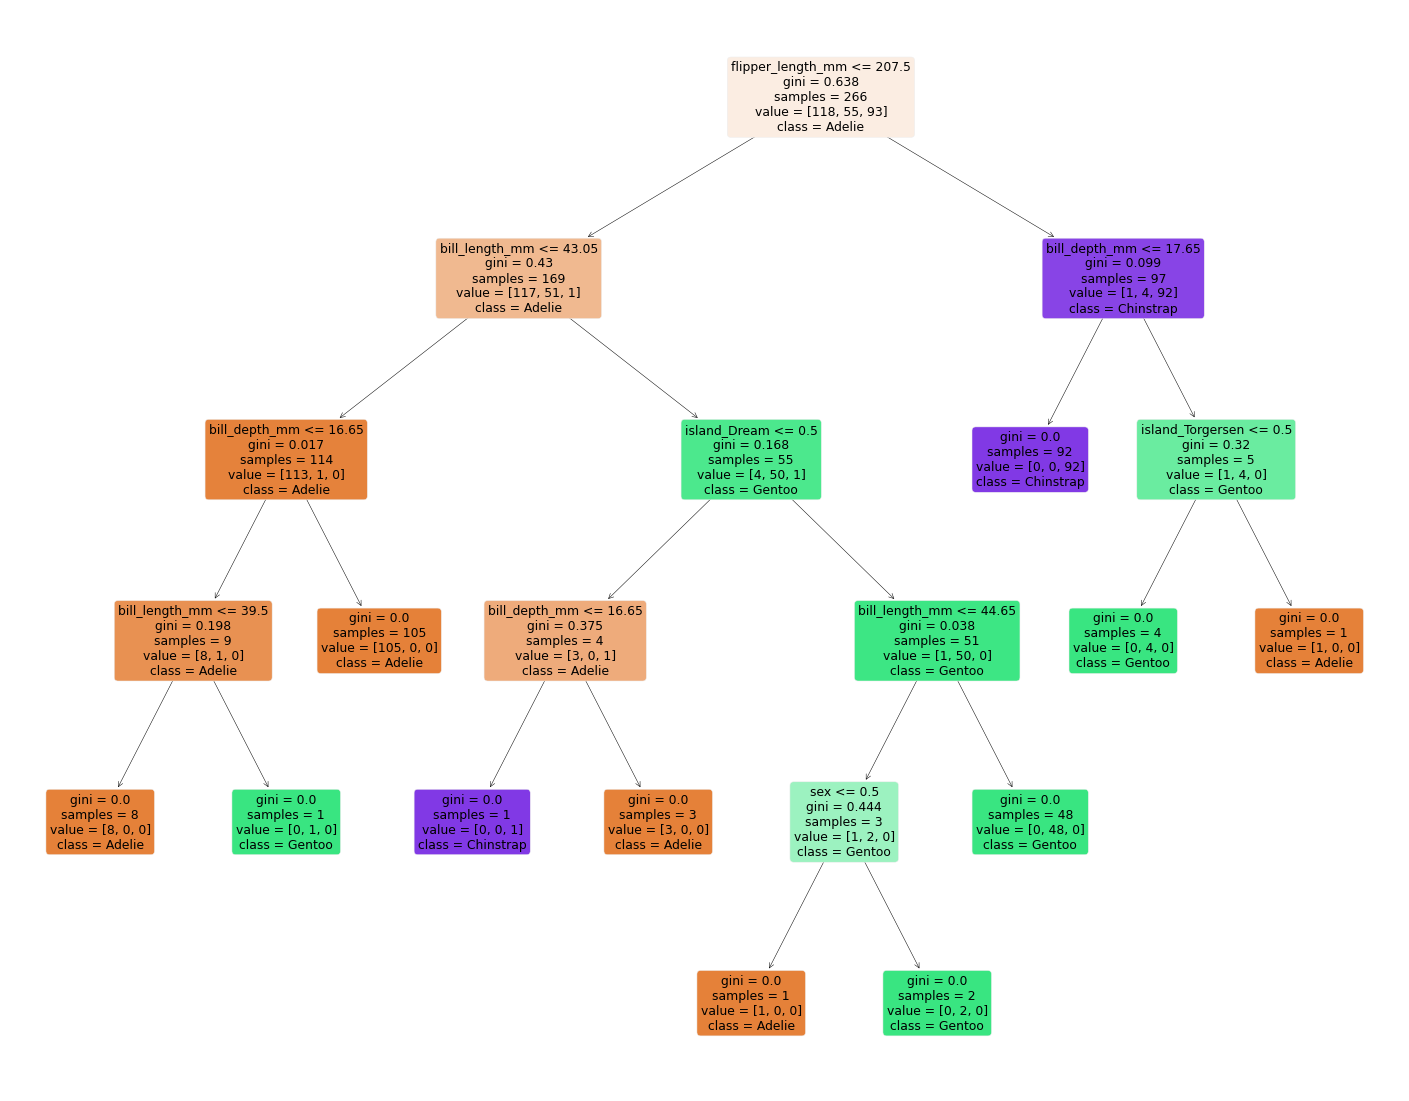

In [77]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
              feature_names= X.columns,  
              class_names= y.unique(),
              rounded=True,
              filled=True)

In [81]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.90      0.96      0.93        28
   Chinstrap       0.91      0.77      0.83        13
      Gentoo       1.00      1.00      1.00        26

    accuracy                           0.94        67
   macro avg       0.94      0.91      0.92        67
weighted avg       0.94      0.94      0.94        67

